In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [3]:


# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load dataset from directory
data_dir = "./Incidents-subset"
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split dataset into training & validation sets
train_size = int(0.8 * len(dataset))  # 80% training
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoaders for training & validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Get class names
class_names = dataset.classes
print("Classes:", class_names)


Classes: ['airplane accident', 'bicycle accident', 'car accident', 'collapsed', 'earthquake', 'flooded', 'ice storm', 'nuclear explosion', 'oil spill', 'tornado', 'volcanic eruption', 'wildfire']


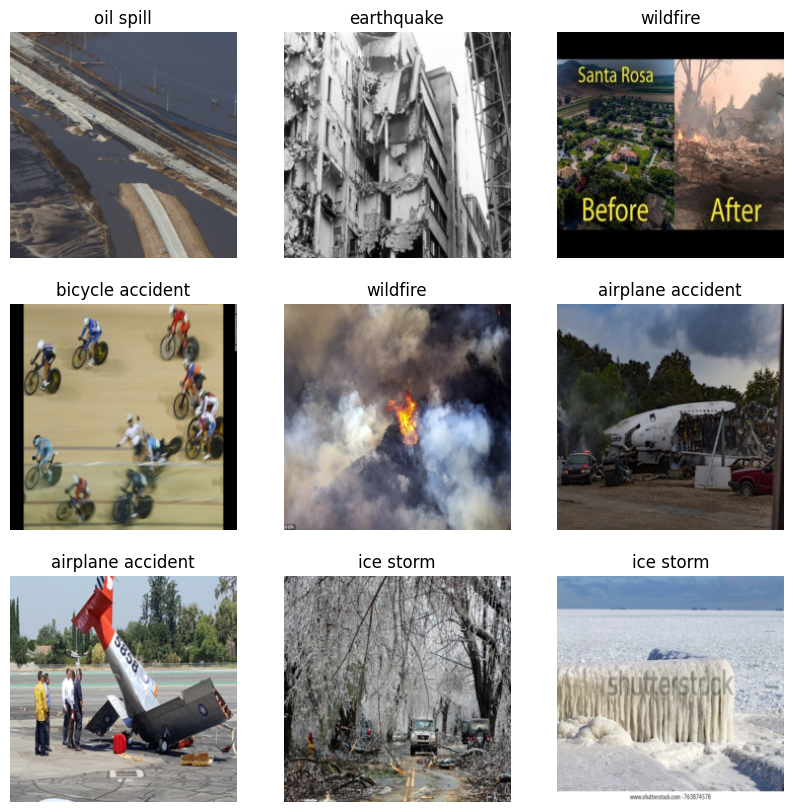

In [6]:
# Function to denormalize images (optional, if you've normalized them)
def denormalize(image):
    image = image.numpy().transpose((1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
    image = image * 0.5 + 0.5  # Reverse normalization (assuming mean=0.5, std=0.5)
    return np.clip(image, 0, 1)  # Ensure pixel values are between 0 and 1

# Get a batch of images from the DataLoader
images, labels = next(iter(train_loader))

# Convert tensor to NumPy and denormalize
images = images[:9]  # Select the first 9 images for visualization
labels = labels[:9]  # Select corresponding labels

# Create a figure
plt.figure(figsize=(10, 10))

for i in range(len(images)):
    ax = plt.subplot(3, 3, i + 1)  # 3x3 grid
    plt.imshow(denormalize(images[i]))  # Convert tensor image to displayable format
    plt.title(class_names[labels[i]])  # Get the class name
    plt.axis("off")

plt.show()
